# Reading and Trimming Signals

In [1]:
import glob, os
from obspy import read, Stream
import matplotlib.pyplot as plt
%matplotlib inline 

### Get list of the folders

In [2]:
cwd = os.getcwd()

In [3]:
dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

### Remove unnecessary folder

In [4]:
dirs.remove('.ipynb_checkpoints')

### Get the list of the files inside in a folder

In [5]:
sacs = glob.glob(dirs[0] + '/*')

## Read all sac files 

In [6]:
st_org = Stream()
for sac in sacs:
    st_org += read(sac,format='SAC')

In [7]:
st_org

6 Trace(s) in Stream:
Seisram.MSCT..HGZ | 2016-08-24T01:36:08.005000Z - 2016-08-24T01:38:20.990000Z | 200.0 Hz, 26598 samples
Seisram.MTL..HGE  | 2016-08-24T01:36:15.849000Z - 2016-08-24T01:38:31.844000Z | 200.0 Hz, 27200 samples
Seisram.MSCT..HGE | 2016-08-24T01:36:08.005000Z - 2016-08-24T01:38:20.990000Z | 200.0 Hz, 26598 samples
Seisram.MSCT..HGN | 2016-08-24T01:36:08.005000Z - 2016-08-24T01:38:20.990000Z | 200.0 Hz, 26598 samples
Seisram.MTL..HGN  | 2016-08-24T01:36:15.849000Z - 2016-08-24T01:38:31.844000Z | 200.0 Hz, 27200 samples
Seisram.MTL..HGZ  | 2016-08-24T01:36:15.849000Z - 2016-08-24T01:38:31.844000Z | 200.0 Hz, 27200 samples

### Plot earthquake signals

/home/dertuncay/anaconda2/lib/python2.7/site-packages/matplotlib/dates.py:1100: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  ' Defaulting to {0}.'.format(interval))


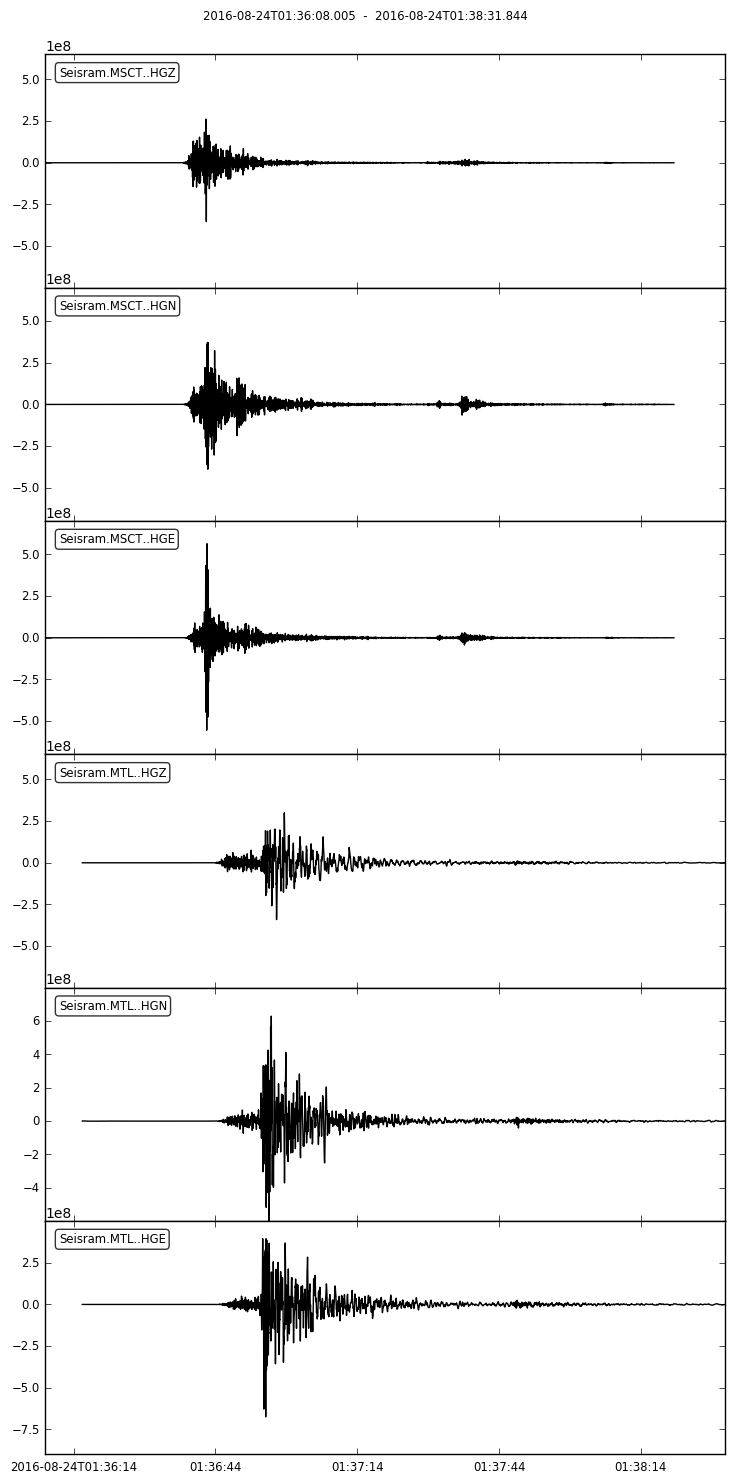

In [8]:
st_org.plot()

### Check header information of the sac files

In [9]:
for tr in st_org:
    print(tr.stats)

         network: Seisram
         station: MSCT
        location: 
         channel: HGZ
       starttime: 2016-08-24T01:36:08.005000Z
         endtime: 2016-08-24T01:38:20.990000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 26598
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 0.0, u'user7': 0.0, u'dist': 16.402681, u'nzyear': 2016, u'nzjday': 237, u'user8': 0.0, u'iztype': 10, u'evla': 42.6531, u'knetwk': u'Seisram ', u'user2': 3.0, u'az': 148.83855, u'idep': 8, u'stdp': 0.0, u'evlo': 13.2476, u'scale': 1.0, u'nvhdr': 6, u'nevid': 0, u'depmin': -352916100.0, u'gcarc': 0.14757223, u'kcmpnm': u'HGZ     ', u'nzsec': 8, u'kevnm': u'                ', u'depmen': -39.307888, u'lpspol': 0, u'stel': 1382.0, u'depmax': 262073020.0, u'iftype': 1, u'cmpinc': 0.0, u'mag': 6.0, u'delta': 0.005, u'lcalda': 1, u'e': 132.99, u'norid': 0, u'nzmsec': 0, u'a': 29.43789, u'ka': u'IPU0    ', u'b': 0.005, u'stla': 42.5267, u'leven': 1, u'stlo': 13

## Trim sac files between the 10 sec after starttime to 20 sec before end time
### One can preserve the original waveform by doing a copy of it and continue to work over it.

In [10]:
st_trimmed = st_org.copy()
for tr in st_trimmed:
    tr.trim(tr.stats.starttime + 10, tr.stats.endtime - 20)

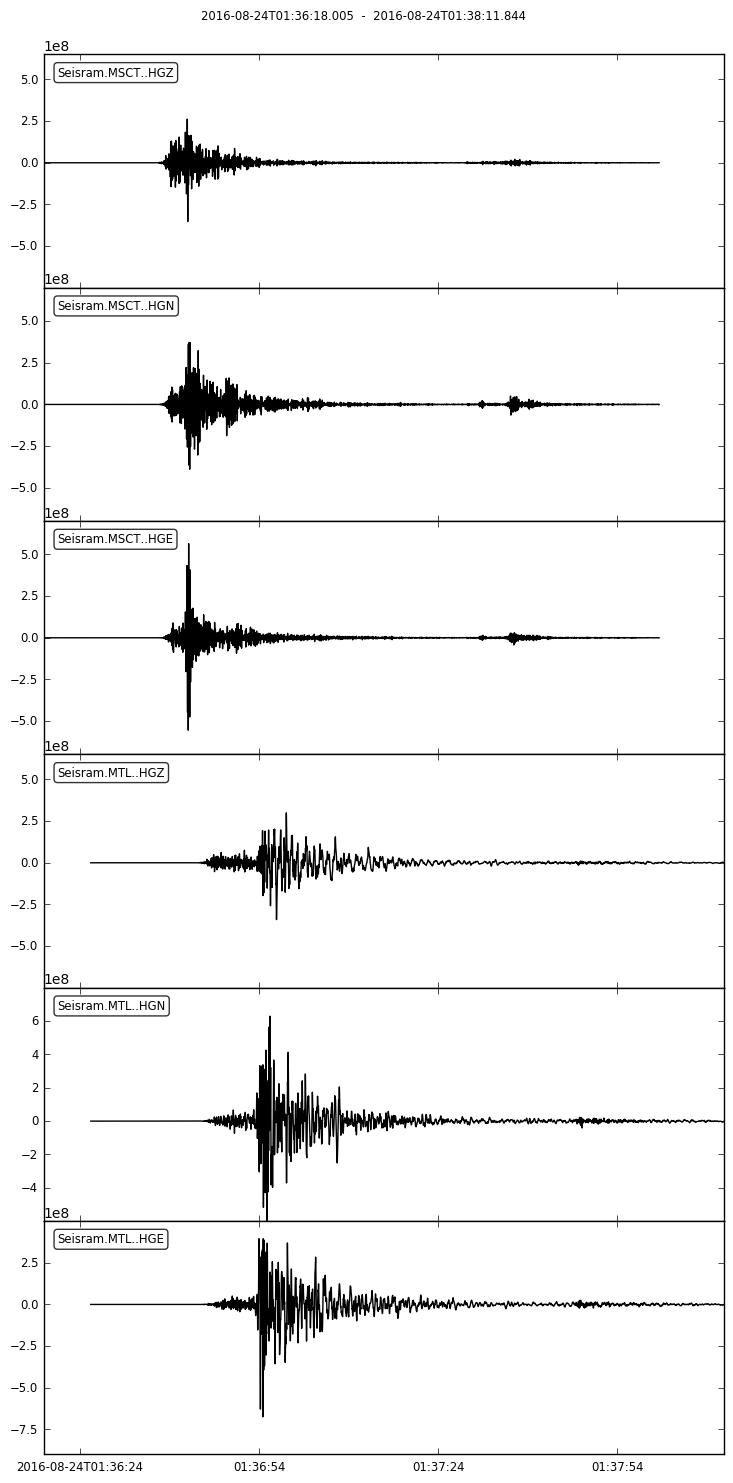

In [11]:
st_trimmed.plot()